In [4]:
#https://lscsoft.docs.ligo.org/bilby/making_priors.html
import bilby
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [43]:
from bilby.core.prior import Uniform, Sine, Cosine, PowerLaw, Constraint

prior_gw150914 = dict(mass_ratio = bilby.gw.prior.UniformInComponentsMassRatio(name='mass_ratio', minimum=0.125, maximum=1),
                    chirp_mass = bilby.gw.prior.UniformInComponentsChirpMass(name='chirp_mass', minimum=25, maximum=31),
                    mass_1 = Constraint(name='mass_1', minimum=10, maximum=80),
                    mass_2 = Constraint(name='mass_2', minimum=10, maximum=80),
                    a_1 = Uniform(name='a_1', minimum=0, maximum=0.99),
                    a_2 = Uniform(name='a_2', minimum=0, maximum=0.99),
                    tilt_1 = Sine(name='tilt_1'),
                    tilt_2 = Sine(name='tilt_2'),
                    phi_12 = Uniform(name='phi_12', minimum=0, maximum=2 * np.pi, boundary='periodic'),
                    phi_jl = Uniform(name='phi_jl', minimum=0, maximum=2 * np.pi, boundary='periodic'),
                    luminosity_distance = PowerLaw(alpha=2, name='luminosity_distance', minimum=50, maximum=2000, unit='Mpc', latex_label='$d_L$'),
                    dec =  Cosine(name='dec'),
                    ra =  Uniform(name='ra', minimum=0, maximum=2 * np.pi, boundary='periodic'),
                    theta_jn =  Sine(name='theta_jn'),
                    psi =  Uniform(name='psi', minimum=0, maximum=np.pi, boundary='periodic'),
                    phase =  Uniform(name='phase', minimum=0, maximum=2 * np.pi, boundary='periodic'))

In [44]:
mass_1 =prior_gw150914['mass_1'].sample(10)
print(type(mass_1))
mass_ratio = prior_gw150914['mass_ratio'].sample(10)
print(mass_ratio)

<class 'NoneType'>
[0.4601913  0.59410828 0.81936501 0.2267143  0.66368098 0.13886423
 0.17626204 0.45288022 0.54790971 0.1745285 ]


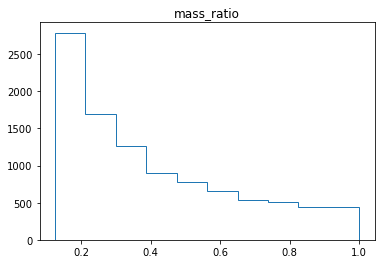

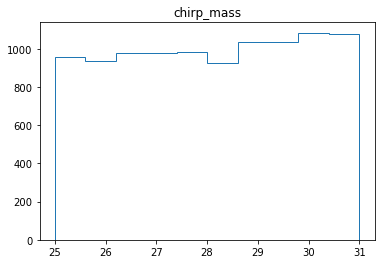

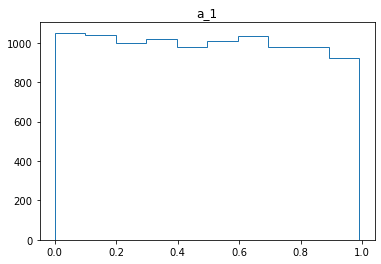

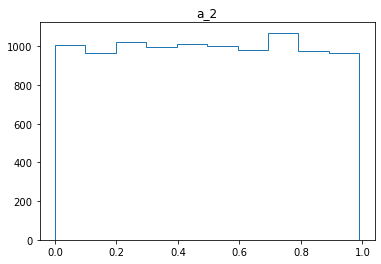

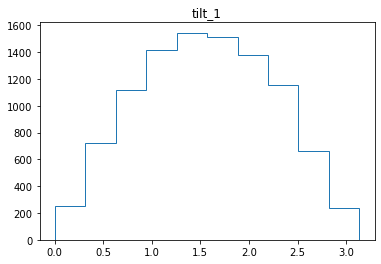

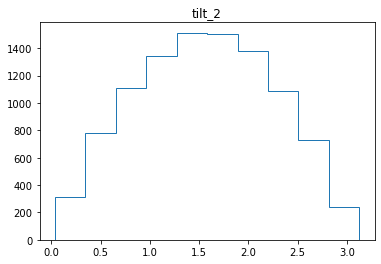

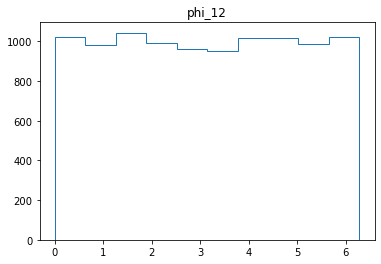

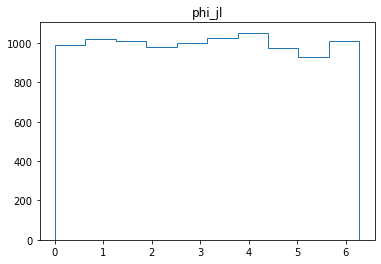

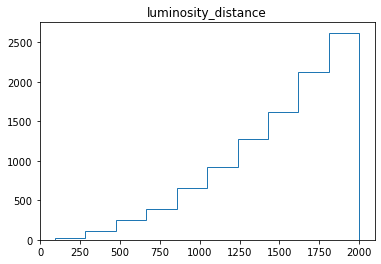

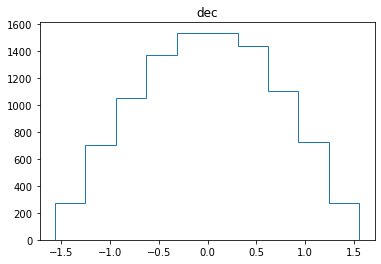

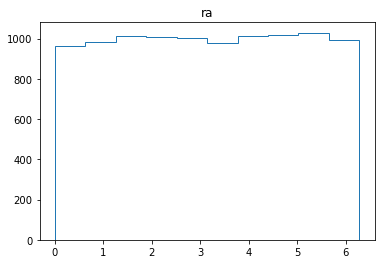

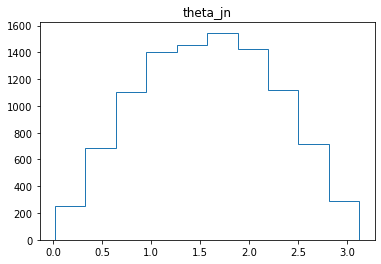

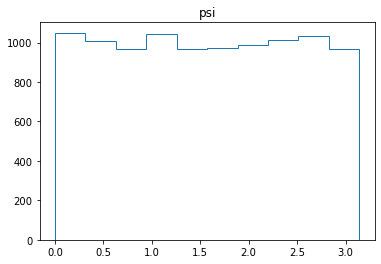

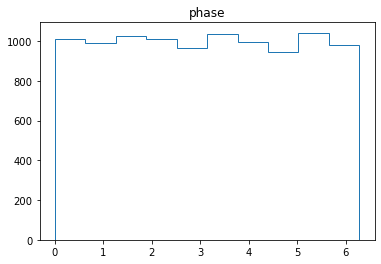

In [47]:
import pylab
%matplotlib inline

for key in prior_gw150914:
    if key in ['mass_1', 'mass_2']:
        pass
    else:
        pylab.title(key)
        pylab.hist(prior_gw150914[key].sample(10000), histtype="step" )
        pylab.show()